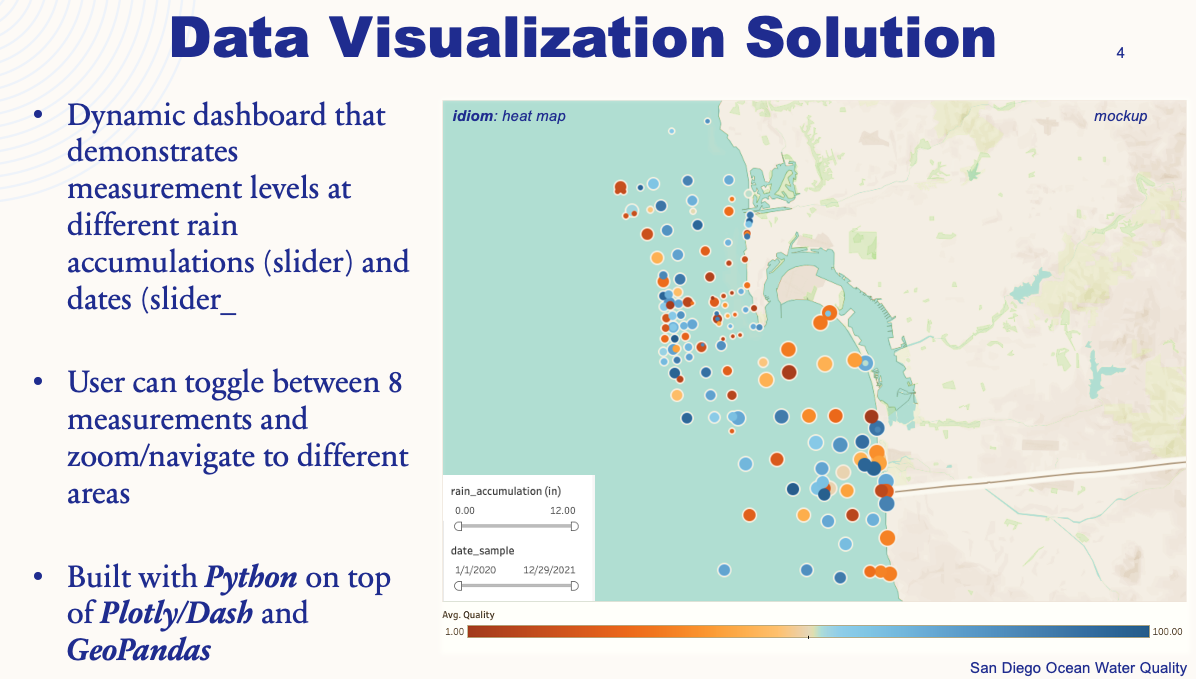

## Water Quality - Ocean Monitoring Program

Ocean water quality data, including bacteriological sampling for fecal indicator bacteria as well as physical, chemical, and biological parameters observed throughout the region. Samples are collected as part of The City’s Ocean Monitoring Program, which monitors the effects of treated wastewater effluent on the local marine environment. The OMP extends 340 square miles total from northern San Diego to northern Baja California, Mexico, and encompasses the shoreline seaward approximately 10 miles, to depths of over 500 meters.

[source](https://data.sandiego.gov/datasets/monitoring-ocean-water-quality/)

Data source: https://data.sandiego.gov/datasets/monitoring-ocean-water-quality/

GeoPandas - plot lat/lon: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 

In [1]:
# %pip install meteostat

In [2]:
# %pip install plotly

In [3]:
# %pip install dash

In [4]:
# %pip install jupyter-dash

In [5]:
import numpy as np
import datetime as dt
import meteostat as ms

In [6]:
from dash import Dash, html, dcc, Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px
import plotly.graph_objects as go

from urllib.request import urlopen
import json
import webbrowser

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon, mapping

# polygon / coastline data

In [7]:
coastline = gpd.read_file("./data/polygons/COASTLINE/coast.shp")
coastline

SD                                           geometry
0   0  LINESTRING (5500000.000 2474777.809, 5500052.0...
1   1  MULTILINESTRING ((6150763.738 2087133.852, 615...
2   0  MULTILINESTRING ((6292062.995 1775304.125, 629...

In [8]:
coastline_lat_long = coastline.to_crs(epsg=4326)
coastline_lat_long

SD                                           geometry
0   0  LINESTRING (-119.76993 34.41035, -119.76976 34...
1   1  MULTILINESTRING ((-117.59618 33.38712, -117.59...
2   0  MULTILINESTRING ((-117.12472 32.53427, -117.12...

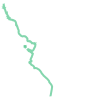

In [9]:
coastline_lat_long['geometry'][2]

In [10]:
# it's a dictionary, we'll use this as geojson :)
coastline_coords = mapping(coastline_lat_long['geometry'][2])
coastline_coords

{'type': 'MultiLineString',
 'coordinates': (((-117.12471993801229, 32.534272721308575),
   (-117.12469244969918, 32.533628399066814),
   (-117.12434015503115, 32.53294618750666),
   (-117.12414036923046, 32.53210141885253),
   (-117.12410598680846, 32.531413856403454),
   (-117.12409628349376, 32.53059728381952),
   (-117.12419555926814, 32.52931853659114),
   (-117.12416485235971, 32.52736321309341),
   (-117.1242513922651, 32.5261092928875),
   (-117.1243714712653, 32.52513032567057),
   (-117.12434144915025, 32.52504705398996),
   (-117.12432332847119, 32.5233802318002),
   (-117.12419189850901, 32.521409133995384),
   (-117.12416759358146, 32.51944483381188),
   (-117.12433118932508, 32.5145056932909),
   (-117.12410048362086, 32.5129905183002),
   (-117.12410798462571, 32.51128984706916),
   (-117.12466455536837, 32.51115396537142),
   (-117.12469572132994, 32.51102559626345),
   (-117.12477712166016, 32.510565335447225),
   (-117.1247827173223, 32.51047528316897),
   (-117.12477

In [11]:
# this is more like it
len((coastline_coords['coordinates'])[0])

3303

In [12]:
# convert to geojson
coastline_coords


{'type': 'MultiLineString',
 'coordinates': (((-117.12471993801229, 32.534272721308575),
   (-117.12469244969918, 32.533628399066814),
   (-117.12434015503115, 32.53294618750666),
   (-117.12414036923046, 32.53210141885253),
   (-117.12410598680846, 32.531413856403454),
   (-117.12409628349376, 32.53059728381952),
   (-117.12419555926814, 32.52931853659114),
   (-117.12416485235971, 32.52736321309341),
   (-117.1242513922651, 32.5261092928875),
   (-117.1243714712653, 32.52513032567057),
   (-117.12434144915025, 32.52504705398996),
   (-117.12432332847119, 32.5233802318002),
   (-117.12419189850901, 32.521409133995384),
   (-117.12416759358146, 32.51944483381188),
   (-117.12433118932508, 32.5145056932909),
   (-117.12410048362086, 32.5129905183002),
   (-117.12410798462571, 32.51128984706916),
   (-117.12466455536837, 32.51115396537142),
   (-117.12469572132994, 32.51102559626345),
   (-117.12477712166016, 32.510565335447225),
   (-117.1247827173223, 32.51047528316897),
   (-117.12477

In [13]:
state_county = gpd.read_file("./data/polygons/State_With_County_Boundaries/State_With_County_Boundaries.shp")
state_county_sd = state_county[state_county['NAME']=='SAN DIEGO'].reset_index(drop=True)
state_county_sd

TYPE       ISLAND              WATER     LOCASE COUNTY_ABB  \
0           Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
1           Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
2           Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
3           Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
4           Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
..           ...          ...                ...        ...        ...   
151         Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
152         Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
153         Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
154         Land  Bay Islands  Misc Bay or Inlet  San Diego        SDG   
155  Constructed          NaN      Pacific Ocean  San Diego        SDG   

     COUNTY COUNTY_COD COUNTY_FIP  SANGIS_JUR       NAME     SHAPE_AREA  \
0        37         37        073         0.0  SAN DIEGO    4024.951590   
1        37         37        073         0.0  SAN DIEGO     118.482483   
2        37         37        073         0.0  SAN DIEGO    3984.697899   
3        37         37        073         0.0  SAN DIEGO     183.692002   
4        37         37        073         0.0  SAN DIEGO     207.807686   
..      ...        ...        ...         ...        ...            ...   
151      37         37        073         0.0  SAN DIEGO    2857.307255   
152      37         37        073         0.0  SAN DIEGO  114163.450599   
153      37         37        073         0.0  SAN DIEGO   28043.290141   
154      37         37        073         0.0  SAN DIEGO    2809.564642   
155      37         37        073         0.0  SAN DIEGO    7247.005649   

       SHAPE_LEN                                           geometry  
0     309.677525  POLYGON ((272090.241 -591977.344, 272093.946 -...  
1      52.740461  POLYGON ((271441.482 -591890.031, 271438.836 -...  
2     294.514152  POLYGON ((272033.091 -591824.944, 272036.531 -...  
3      74.035167  POLYGON ((271599.703 -591804.306, 271597.057 -...  
4      64.588997  POLYGON ((271955.304 -591715.935, 271952.922 -...  
..           ...                                                ...  
151   461.727386  POLYGON ((271949.880 -595469.057, 271952.790 -...  
152  3298.788565  POLYGON ((269610.032 -593972.835, 269587.543 -...  
153  1136.892468  POLYGON ((271809.650 -592151.705, 271818.117 -...  
154   268.501273  POLYGON ((271008.623 -592030.261, 271003.595 -...  
155  1220.763283  POLYGON ((257752.067 -580243.121, 257735.474 -...  

[156 rows x 13 columns]

In [14]:
type(state_county_sd['geometry'][155])

shapely.geometry.polygon.Polygon

In [15]:
# us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

# fig = px.scatter_mapbox(us_cities, 
#                         lat="lat", 
#                         lon="lon", 
#                         hover_name="City", 
#                         hover_data=["State", "Population"],
#                         color_discrete_sequence=["fuchsia"], 
#                         zoom=3, height=300)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

# water quality data

In [16]:
os.listdir()

['.DS_Store',
 'Ocean Water Quality - scattergeo.ipynb',
 'Ocean Water Quality - scattermapbox.ipynb',
 'dse241 - project proposal - AH.pptx',
 'viz mockup.twb',
 '.ipynb_checkpoints',
 'data',
 'potential solutions.ipynb',
 'meteostat - weather data.ipynb']

In [17]:
data_dict = pd.read_csv("./data/water_quality_dictionary_datasd.csv")
data_dict

field                                        description  \
0       sample                                   Unique sample ID   
1      station  Unique location ID where sample was collected....   
2      depth_m                                    Depth in meters   
3  date_sample                          Date sample was collected   
4         time                          Time sample was collected   
5      project          Outfall region where sample was collected   
6    parameter                              Factor being recorded   
7    qualifier                                Qualifier for value   
8        value                                       Result value   
9        units                              Units of result value   

                                     possible_values  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5  PLOO (PL): Point Loma Ocean Outfall; SBOO: Sou...  
6  fluorometry; DENSITY; DO; ENTERO; FECAL; OG; P...  
7                                <, >, e, LA, ND, NS  
8                                                NaN  
9     %; C; CFU/100 ml; mg/L; pH; ppt; sigma-t; ug/L

In [18]:
data_dict.iloc[6,2]

'fluorometry; DENSITY; DO; ENTERO; FECAL; OG; PH; SALINITY; SUSO; TEMP; TOTAL; pct_light'

In [19]:
locs = pd.read_csv("./data/reference_stations_water_quality.csv")
locs

station       lat       long
0       I25  32.56117 -117.14800
1       I26  32.57450 -117.14700
2       S10  32.54330 -117.12500
3       S11  32.56130 -117.13200
4        S4  32.53530 -117.12500
..      ...       ...        ...
152      B6  32.82833 -117.29250
153      A3  32.65167 -117.29717
154      A4  32.68450 -117.30700
155     A15  32.66833 -117.28167
156     A16  32.67633 -117.28417

[157 rows x 3 columns]

In [20]:
data = pd.read_csv("./data/water_quality_2020_2021_datasd.csv")
data

sample station  depth_m date_sample         time project parameter  \
0      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO    ENTERO   
1      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     TOTAL   
2      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     FECAL   
3      2001018680      S4      NaN  2020-01-01          NaN    SBOO     TOTAL   
4      2001018680      S4      NaN  2020-01-01          NaN    SBOO     FECAL   
...           ...     ...      ...         ...          ...     ...       ...   
70158  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO    ENTERO   
70159  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO     TOTAL   
70160  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     FECAL   
70161  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO    ENTERO   
70162  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     TOTAL   

      qualifier  value       units  
0             e  220.0  CFU/100 mL  
1            NR    NaN  CFU/100 mL  
2            NR    NaN  CFU/100 mL  
3            NS    NaN  CFU/100 mL  
4            NS    NaN  CFU/100 mL  
...         ...    ...         ...  
70158         e   14.0  CFU/100 mL  
70159         <  200.0  CFU/100 mL  
70160         <    2.0  CFU/100 mL  
70161         e    4.0  CFU/100 mL  
70162         <   20.0  CFU/100 mL  

[70163 rows x 10 columns]

In [21]:
data.nunique()

sample         15333
station          104
depth_m           16
date_sample      369
time             383
project            2
parameter         10
qualifier          7
value           8190
units              8
dtype: int64

In [22]:
# there are more stations than in the measurement
# but thankfully every station with a measurement is accounted for
len(set(data['station']).difference(set(locs['station'])))

0

In [23]:
data['station'].nunique()

104

In [24]:
pd.to_datetime(data['date_sample']).min()

Timestamp('2020-01-01 00:00:00')

In [25]:
pd.to_datetime(data['date_sample']).max()

Timestamp('2021-12-29 00:00:00')

In [26]:
data = pd.merge(
    data,
    locs,
    how='left',
    left_on='station',
    right_on='station'
)

data

sample station  depth_m date_sample         time project parameter  \
0      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO    ENTERO   
1      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     TOTAL   
2      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     FECAL   
3      2001018680      S4      NaN  2020-01-01          NaN    SBOO     TOTAL   
4      2001018680      S4      NaN  2020-01-01          NaN    SBOO     FECAL   
...           ...     ...      ...         ...          ...     ...       ...   
70158  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO    ENTERO   
70159  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO     TOTAL   
70160  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     FECAL   
70161  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO    ENTERO   
70162  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     TOTAL   

      qualifier  value       units       lat       long  
0             e  220.0  CFU/100 mL  32.56130 -117.13200  
1            NR    NaN  CFU/100 mL  32.56130 -117.13200  
2            NR    NaN  CFU/100 mL  32.56130 -117.13200  
3            NS    NaN  CFU/100 mL  32.53530 -117.12500  
4            NS    NaN  CFU/100 mL  32.53530 -117.12500  
...         ...    ...         ...       ...        ...  
70158         e   14.0  CFU/100 mL  32.73945 -117.25499  
70159         <  200.0  CFU/100 mL  32.73945 -117.25499  
70160         <    2.0  CFU/100 mL  32.74667 -117.25402  
70161         e    4.0  CFU/100 mL  32.74667 -117.25402  
70162         <   20.0  CFU/100 mL  32.74667 -117.25402  

[70163 rows x 12 columns]

In [27]:
data_dict.iloc[6,2]

'fluorometry; DENSITY; DO; ENTERO; FECAL; OG; PH; SALINITY; SUSO; TEMP; TOTAL; pct_light'

In [28]:
data[data['depth_m'].notna()]

sample station  depth_m date_sample          time project  \
8      2001029022      A1      1.0  2020-01-02   7:44:00 PST    PLOO   
9      2001029022      A1      1.0  2020-01-02   7:44:00 PST    PLOO   
10     2001029022      A1      1.0  2020-01-02   7:44:00 PST    PLOO   
11     2001029022      A1      1.0  2020-01-02   7:44:00 PST    PLOO   
12     2001029022      A1      1.0  2020-01-02   7:44:00 PST    PLOO   
...           ...     ...      ...         ...           ...     ...   
70101  2112271349     I40      9.0  2021-12-27  10:18:00 PST    SBOO   
70102  2112271349     I40      9.0  2021-12-27  10:18:00 PST    SBOO   
70103  2112271349     I40      9.0  2021-12-27  10:18:00 PST    SBOO   
70104  2112271349     I40      9.0  2021-12-27  10:18:00 PST    SBOO   
70105  2112271349     I40      9.0  2021-12-27  10:18:00 PST    SBOO   

         parameter qualifier   value    units       lat       long  
8             TEMP       NaN  15.010        C  32.65933 -117.26200  
9               DO       NaN   7.690     mg/L  32.65933 -117.26200  
10              PH       NaN   8.100       pH  32.65933 -117.26200  
11     CHLOROPHYLL       NaN   1.700     ug/L  32.65933 -117.26200  
12             XMS       NaN  77.110        %  32.65933 -117.26200  
...            ...       ...     ...      ...       ...        ...  
70101  CHLOROPHYLL       NaN   2.160     ug/L  32.55383 -117.13617  
70102          XMS       NaN  29.950        %  32.55383 -117.13617  
70103           DO       NaN   7.600     mg/L  32.55383 -117.13617  
70104           PH       NaN   7.950       pH  32.55383 -117.13617  
70105      DENSITY       NaN  24.726  sigma-t  32.55383 -117.13617  

[63330 rows x 12 columns]

In [29]:
# pretty balanced measurements
data['parameter'].value_counts()

ENTERO         8680
FECAL          7489
TOTAL          7479
TEMP           6645
DO             6645
PH             6645
CHLOROPHYLL    6645
XMS            6645
SALINITY       6645
DENSITY        6645
Name: parameter, dtype: int64

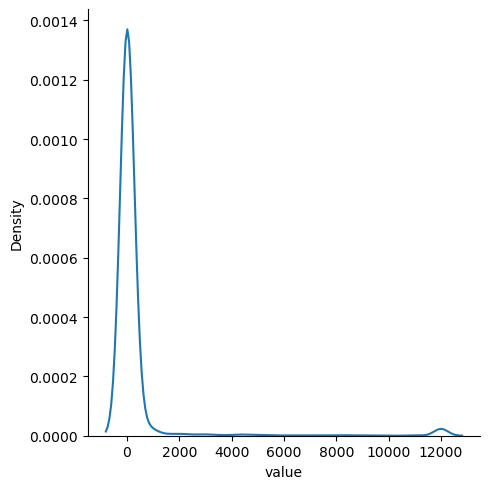

In [30]:
sns.displot(data[data['parameter']=='ENTERO']['value'], kind="kde");

# Get Precipitation data

In [31]:
# lat lon for nearby area
crown_point = (32.786670, -117.238620)

# start = dt(2020, 1, 1)
# end = dt(2021, 12, 29)


# going to use rolling sum so want 7 days prior
start = pd.to_datetime(data['date_sample'].min()).to_pydatetime() - dt.timedelta(days=7)
end = pd.to_datetime(data['date_sample'].max()).to_pydatetime()

# get closest weather station
diego = ms.Point(crown_point[0], crown_point[1], 70)

# call the api
rain_data = ms.Daily(diego, start, end)
rain_data = rain_data.fetch()['prcp']

# move timestamp into column
rain_data = rain_data.reset_index()

# convert datetype for joining
rain_data['time'] = rain_data['time'].astype(str)

rain_data = rain_data.rename(columns={'time': 'date', 'prcp': 'prcp_mm'})
rain_data['week_prcp_mm'] = rain_data['prcp_mm'].rolling(7).sum()
# rolling function has some unexpected behavior that yields negative numbers very close to zero
rain_data['week_prcp_mm'] = np.around(rain_data['week_prcp_mm'], decimals=2)
rain_data = rain_data.dropna().reset_index(drop=True)
rain_data

date  prcp_mm  week_prcp_mm
0    2019-12-31      0.0          32.5
1    2020-01-01      0.0          32.5
2    2020-01-02      0.0           0.0
3    2020-01-03      0.0           0.0
4    2020-01-04      0.0           0.0
..          ...      ...           ...
725  2021-12-25      4.6          25.4
726  2021-12-26      2.0          27.4
727  2021-12-27      1.3          28.7
728  2021-12-28      2.0          30.7
729  2021-12-29      6.9          37.6

[730 rows x 3 columns]

In [32]:
# this could be pesky
rain_data['week_prcp_mm'].min()

-0.0

In [33]:
rain_data[rain_data['week_prcp_mm'] < 0.1]

date  prcp_mm  week_prcp_mm
2    2020-01-02      0.0           0.0
3    2020-01-03      0.0           0.0
4    2020-01-04      0.0           0.0
5    2020-01-05      0.0           0.0
6    2020-01-06      0.0           0.0
..          ...      ...           ...
704  2021-12-04      0.0          -0.0
705  2021-12-05      0.0          -0.0
706  2021-12-06      0.0          -0.0
707  2021-12-07      0.0          -0.0
708  2021-12-08      0.0          -0.0

[450 rows x 3 columns]

In [34]:
rain_data[rain_data['week_prcp_mm'] < 0]

Empty DataFrame
Columns: [date, prcp_mm, week_prcp_mm]
Index: []

min:  0.0
max:  29.5


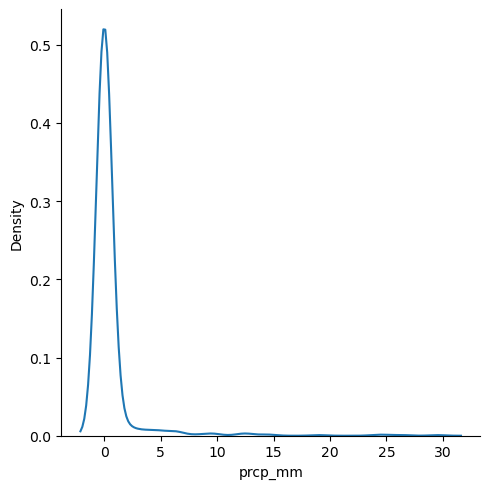

In [35]:
print('min: ', rain_data['prcp_mm'].min())
print('max: ', rain_data['prcp_mm'].max())

sns.displot(rain_data['prcp_mm'], kind='kde');

min:  -0.0
max:  91.2


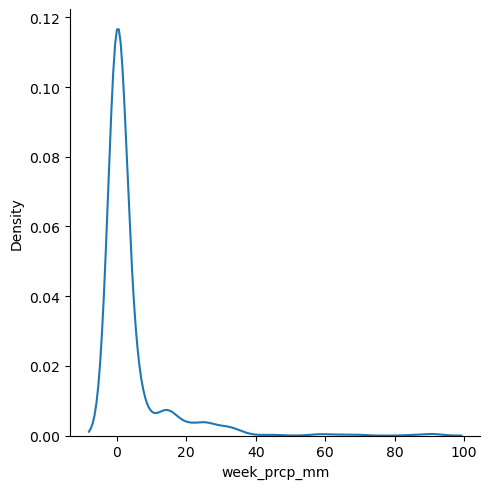

In [36]:
print('min: ', rain_data['week_prcp_mm'].min())
print('max: ', rain_data['week_prcp_mm'].max())

sns.displot(rain_data['week_prcp_mm'], kind='kde');

In [37]:
# bring rain data
data = pd.merge(
    data,
    rain_data,
    how='left',
    left_on='date_sample',
    right_on='date'
)

# delete superfluous column
data = data.drop(['date'], axis=1)
data

sample station  depth_m date_sample         time project parameter  \
0      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO    ENTERO   
1      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     TOTAL   
2      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     FECAL   
3      2001018680      S4      NaN  2020-01-01          NaN    SBOO     TOTAL   
4      2001018680      S4      NaN  2020-01-01          NaN    SBOO     FECAL   
...           ...     ...      ...         ...          ...     ...       ...   
70158  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO    ENTERO   
70159  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO     TOTAL   
70160  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     FECAL   
70161  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO    ENTERO   
70162  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     TOTAL   

      qualifier  value       units       lat       long  prcp_mm  week_prcp_mm  
0             e  220.0  CFU/100 mL  32.56130 -117.13200      0.0          32.5  
1            NR    NaN  CFU/100 mL  32.56130 -117.13200      0.0          32.5  
2            NR    NaN  CFU/100 mL  32.56130 -117.13200      0.0          32.5  
3            NS    NaN  CFU/100 mL  32.53530 -117.12500      0.0          32.5  
4            NS    NaN  CFU/100 mL  32.53530 -117.12500      0.0          32.5  
...         ...    ...         ...       ...        ...      ...           ...  
70158         e   14.0  CFU/100 mL  32.73945 -117.25499      6.9          37.6  
70159         <  200.0  CFU/100 mL  32.73945 -117.25499      6.9          37.6  
70160         <    2.0  CFU/100 mL  32.74667 -117.25402      6.9          37.6  
70161         e    4.0  CFU/100 mL  32.74667 -117.25402      6.9          37.6  
70162         <   20.0  CFU/100 mL  32.74667 -117.25402      6.9          37.6  

[70163 rows x 14 columns]

# MVP
create a scatter/point plot of the measurement locations

[money documentation](https://plotly.com/python/mapbox-layers/?_gl=1*1qyo6lu*_ga*OTMzNzQ4MDQxLjE2NzY2MjA3MjY.*_ga_6G7EE0JNSC*MTY3OTU0MzIxMC4yNS4xLjE2Nzk1NDQ4NzIuMC4wLjA.)

In [38]:
# # plotly example
# us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

# fig = px.scatter_mapbox(us_cities, 
#                         lat="lat", 
#                         lon="lon", 
#                         hover_name="City", 
#                         hover_data=["State", "Population"],
#                         color_discrete_sequence=["fuchsia"], 
#                         zoom=3, height=300)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [39]:
# # MVP
# fig = px.scatter_mapbox(data, 
#                         lat="lat", 
#                         lon="long", 
#                         hover_name="station", 
#                         #hover_data=["station"],
#                         color_discrete_sequence=["fuchsia"], 
#                         zoom=8, 
#                         height=300
#                        )

# fig.update_layout(mapbox_style="open-street-map")
# ## this unfortunately doesn't have good resolution in some parts of the ocean
# # fig.update_layout(
# #     mapbox_style="white-bg",
# #     mapbox_layers=[
# #         {
# #             "below": "traces",
# #             "sourcetype": "raster",
# #             "sourceattribution": "USGS",
# #             "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
# #         }
        
# #     ]
# # )

# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# #fig.update_layout(mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}) # plotly version 5.11 needed
# fig.update_geos(fitbounds='locations', visible=True)

# fig.show()

In [40]:
# # for MVP, let's use just one parameter
# data = data[data['parameter'] == 'TEMP']
# data.head()

In [41]:
# sns.displot(data['value'], kde=True);

In [42]:
data.groupby(['parameter'])['sample'].nunique()

parameter
CHLOROPHYLL    6645
DENSITY        6645
DO             6645
ENTERO         8680
FECAL          7489
PH             6645
SALINITY       6645
TEMP           6645
TOTAL          7479
XMS            6645
Name: sample, dtype: int64

In [43]:
features = sorted(data['parameter'].unique())

for feat in features:
    print(f"feature_description['{feat}'] = ''")

feature_description['CHLOROPHYLL'] = ''
feature_description['DENSITY'] = ''
feature_description['DO'] = ''
feature_description['ENTERO'] = ''
feature_description['FECAL'] = ''
feature_description['PH'] = ''
feature_description['SALINITY'] = ''
feature_description['TEMP'] = ''
feature_description['TOTAL'] = ''
feature_description['XMS'] = ''


In [44]:
# feature_description = {feat:'' for feat in features}

feature_description = {}
feature_description['CHLOROPHYLL'] = 'indicator for photosynthetic plankton'
feature_description['DENSITY'] = 'density of coliform (bacteria)'
feature_description['DO'] = 'dissolved oxygen'
feature_description['ENTERO'] = 'enteroccus (bacteria), indicator of sewage'
feature_description['FECAL'] = 'fecal matter in water, indicator of sewage'
feature_description['PH'] = 'acidity / basicness of water'
feature_description['SALINITY'] = 'disolved salt content'
feature_description['TEMP'] = 'water temperature in degrees Celsius'
feature_description['TOTAL'] = 'unclear'
feature_description['XMS'] = 'transmissivity of light in water'

feature_description

{'CHLOROPHYLL': 'indicator for photosynthetic plankton',
 'DENSITY': 'density of coliform (bacteria)',
 'DO': 'dissolved oxygen',
 'ENTERO': 'enteroccus (bacteria), indicator of sewage',
 'FECAL': 'fecal matter in water, indicator of sewage',
 'PH': 'acidity / basicness of water',
 'SALINITY': 'disolved salt content',
 'TEMP': 'water temperature in degrees Celsius',
 'TOTAL': 'unclear',
 'XMS': 'transmissivity of light in water'}

In [45]:
data[data['parameter']=='XMS']

sample station  depth_m date_sample          time project  \
12     2001029022      A1      1.0  2020-01-02   7:44:00 PST    PLOO   
23     2001029023      A1     12.0  2020-01-02   7:44:00 PST    PLOO   
33     2001029024      A1     18.0  2020-01-02   7:44:00 PST    PLOO   
44     2001029025      A6      1.0  2020-01-02   8:18:00 PST    PLOO   
50     2001029026      A6     12.0  2020-01-02   8:18:00 PST    PLOO   
...           ...     ...      ...         ...           ...     ...   
70065  2112271345     I39     12.0  2021-12-27   9:46:00 PST    SBOO   
70067  2112271346     I39     18.0  2021-12-27   9:46:00 PST    SBOO   
70081  2112271347     I40      2.0  2021-12-27  10:18:00 PST    SBOO   
70094  2112271348     I40      6.0  2021-12-27  10:18:00 PST    SBOO   
70102  2112271349     I40      9.0  2021-12-27  10:18:00 PST    SBOO   

      parameter qualifier  value units       lat       long  prcp_mm  \
12          XMS       NaN  77.11     %  32.65933 -117.26200      0.0   
23          XMS       NaN  81.66     %  32.65933 -117.26200      0.0   
33          XMS       NaN  72.56     %  32.65933 -117.26200      0.0   
44          XMS       NaN  81.46     %  32.69267 -117.26967      0.0   
50          XMS       NaN  81.12     %  32.69267 -117.26967      0.0   
...         ...       ...    ...   ...       ...        ...      ...   
70065       XMS       NaN  80.44     %  32.57233 -117.16750      1.3   
70067       XMS       NaN  80.14     %  32.57233 -117.16750      1.3   
70081       XMS       NaN  37.11     %  32.55383 -117.13617      1.3   
70094       XMS       NaN  35.12     %  32.55383 -117.13617      1.3   
70102       XMS       NaN  29.95     %  32.55383 -117.13617      1.3   

       week_prcp_mm  
12              0.0  
23              0.0  
33              0.0  
44              0.0  
50              0.0  
...             ...  
70065          28.7  
70067          28.7  
70081          28.7  
70094          28.7  
70102          28.7  

[6645 rows x 14 columns]

https://www.ibwc.gov/Files/2015_SBOO_AnnualReceivingWatersMonitoringAssessmentReport.pdf
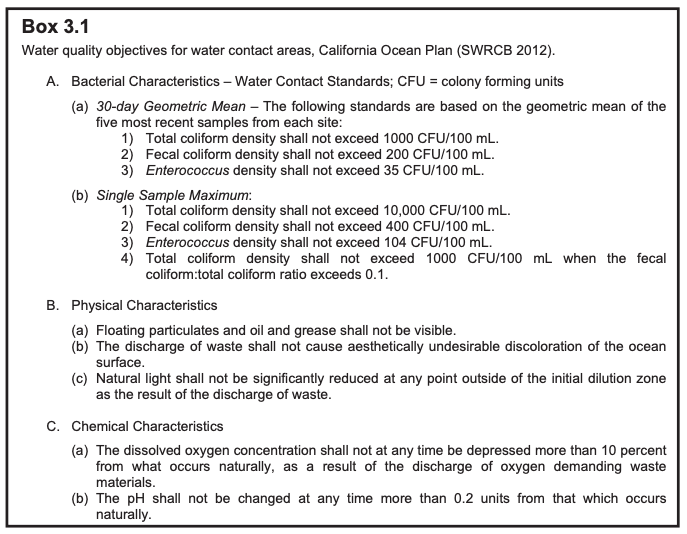

In [46]:
data.head()

sample station  depth_m date_sample         time project parameter  \
0  2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO    ENTERO   
1  2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     TOTAL   
2  2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     FECAL   
3  2001018680      S4      NaN  2020-01-01          NaN    SBOO     TOTAL   
4  2001018680      S4      NaN  2020-01-01          NaN    SBOO     FECAL   

  qualifier  value       units      lat     long  prcp_mm  week_prcp_mm  
0         e  220.0  CFU/100 mL  32.5613 -117.132      0.0          32.5  
1        NR    NaN  CFU/100 mL  32.5613 -117.132      0.0          32.5  
2        NR    NaN  CFU/100 mL  32.5613 -117.132      0.0          32.5  
3        NS    NaN  CFU/100 mL  32.5353 -117.125      0.0          32.5  
4        NS    NaN  CFU/100 mL  32.5353 -117.125      0.0          32.5

In [47]:
# create the number of measurements for a site, specific to each parameter
measurement_counts = data.groupby(['station', 'parameter'])[['sample']].nunique().reset_index()
measurement_counts = measurement_counts.rename(columns={'sample': 'n_measurements'})
measurement_counts

station    parameter  n_measurements
0        A1  CHLOROPHYLL             314
1        A1      DENSITY             314
2        A1           DO             314
3        A1       ENTERO             315
4        A1        FECAL             315
..      ...          ...             ...
787      S8        FECAL             113
788      S8        TOTAL             113
789      S9       ENTERO             108
790      S9        FECAL             106
791      S9        TOTAL             106

[792 rows x 3 columns]

In [48]:
# bring back to original dataframe
data = pd.merge(data,
        measurement_counts,
         how='left',
         left_on=['station', 'parameter'],
         right_on=['station', 'parameter']
        )

data

sample station  depth_m date_sample         time project parameter  \
0      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO    ENTERO   
1      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     TOTAL   
2      2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     FECAL   
3      2001018680      S4      NaN  2020-01-01          NaN    SBOO     TOTAL   
4      2001018680      S4      NaN  2020-01-01          NaN    SBOO     FECAL   
...           ...     ...      ...         ...          ...     ...       ...   
70158  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO    ENTERO   
70159  2112291249    D8-B      NaN  2021-12-29  9:36:00 PST    PLOO     TOTAL   
70160  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     FECAL   
70161  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO    ENTERO   
70162  2112291250      D9      NaN  2021-12-29  9:22:00 PST    PLOO     TOTAL   

      qualifier  value       units       lat       long  prcp_mm  \
0             e  220.0  CFU/100 mL  32.56130 -117.13200      0.0   
1            NR    NaN  CFU/100 mL  32.56130 -117.13200      0.0   
2            NR    NaN  CFU/100 mL  32.56130 -117.13200      0.0   
3            NS    NaN  CFU/100 mL  32.53530 -117.12500      0.0   
4            NS    NaN  CFU/100 mL  32.53530 -117.12500      0.0   
...         ...    ...         ...       ...        ...      ...   
70158         e   14.0  CFU/100 mL  32.73945 -117.25499      6.9   
70159         <  200.0  CFU/100 mL  32.73945 -117.25499      6.9   
70160         <    2.0  CFU/100 mL  32.74667 -117.25402      6.9   
70161         e    4.0  CFU/100 mL  32.74667 -117.25402      6.9   
70162         <   20.0  CFU/100 mL  32.74667 -117.25402      6.9   

       week_prcp_mm  n_measurements  
0              32.5             147  
1              32.5             136  
2              32.5             138  
3              32.5             155  
4              32.5             158  
...             ...             ...  
70158          37.6              98  
70159          37.6              95  
70160          37.6             105  
70161          37.6             106  
70162          37.6             105  

[70163 rows x 15 columns]

In [49]:
# create str labels for tooltip
data['unit_values'] = data['value'].astype(str) + ' ' + data['units']

In [50]:
# create str labels for measurement scale
data['unit_labels'] = data['parameter'] + ' ' + data['units']

In [51]:
# # let's play around with the size mark
# # make the number of measurements at each station the size of each mark
# station_counts = data['station'].value_counts()
# data['n_measurements'] = data['station'].map(station_counts)

In [52]:
# sns.displot(data['n_measurements'], kde=True);

In [53]:
# data['n_measurements'].value_counts()

cross plot some variables - perhaps will want to include a scatter plot

In [54]:
samp = data.head(100)

In [55]:
daily_avg = data.groupby(['date_sample', 'parameter'])['value'].mean().unstack()
daily_avg

parameter    CHLOROPHYLL    DENSITY        DO       ENTERO         FECAL  \
date_sample                                                                
2020-01-01           NaN        NaN       NaN   210.000000           NaN   
2020-01-02      1.152889  24.684556  7.667111   121.018868    206.754717   
2020-01-03           NaN        NaN       NaN  6150.000000  12000.000000   
2020-01-05           NaN        NaN       NaN  6060.000000  12000.000000   
2020-01-07      1.429556  24.739844  7.485556    91.963636    160.072727   
...                  ...        ...       ...          ...           ...   
2021-12-21      1.559556  24.933756  7.076667    92.250000    152.392857   
2021-12-22           NaN        NaN       NaN    14.750000      5.750000   
2021-12-27      1.615556  24.728289  7.714889   125.644444    288.711111   
2021-12-28           NaN        NaN       NaN  3616.363636   4477.818182   
2021-12-29           NaN        NaN       NaN     4.500000      5.000000   

parameter          PH   SALINITY       TEMP         TOTAL        XMS  
date_sample                                                           
2020-01-01        NaN        NaN        NaN           NaN        NaN  
2020-01-02   8.145556  33.381778  15.182667   1170.301887  60.919333  
2020-01-03        NaN        NaN        NaN  16000.000000        NaN  
2020-01-05        NaN        NaN        NaN  16000.000000        NaN  
2020-01-07   8.077111  33.447089  15.160444   1123.381818  63.613778  
...               ...        ...        ...           ...        ...  
2021-12-21   7.918889  33.474111  14.344222    574.321429  79.475556  
2021-12-22        NaN        NaN        NaN     36.000000        NaN  
2021-12-27   7.981111  33.409222  15.079778   1678.000000  72.183556  
2021-12-28        NaN        NaN        NaN   7563.636364        NaN  
2021-12-29        NaN        NaN        NaN     70.250000        NaN  

[369 rows x 10 columns]

In [56]:
# sns.pairplot(daily_avg, corner=False);

In [57]:
# plt.figure(figsize=(24,24))
# sns.set(font_scale=2)

# sns.heatmap(daily_avg.corr(),
#            vmin=-1,
#             vmax=1,
#             cmap=sns.diverging_palette(220,10,n=21),       
#            );

In [58]:
samp = data[data['parameter']=='ENTERO'][['value', 'week_prcp_mm']]
samp

value  week_prcp_mm
0      220.0          32.5
6      200.0          32.5
17       2.0           0.0
25       2.0           0.0
28       2.0           0.0
...      ...           ...
70150    2.0          37.6
70152    2.0          37.6
70155    6.0          37.6
70158   14.0          37.6
70161    4.0          37.6

[8680 rows x 2 columns]

In [59]:
data.head()

sample station  depth_m date_sample         time project parameter  \
0  2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO    ENTERO   
1  2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     TOTAL   
2  2001018683     S11      NaN  2020-01-01  9:18:00 PST    SBOO     FECAL   
3  2001018680      S4      NaN  2020-01-01          NaN    SBOO     TOTAL   
4  2001018680      S4      NaN  2020-01-01          NaN    SBOO     FECAL   

  qualifier  value       units      lat     long  prcp_mm  week_prcp_mm  \
0         e  220.0  CFU/100 mL  32.5613 -117.132      0.0          32.5   
1        NR    NaN  CFU/100 mL  32.5613 -117.132      0.0          32.5   
2        NR    NaN  CFU/100 mL  32.5613 -117.132      0.0          32.5   
3        NS    NaN  CFU/100 mL  32.5353 -117.125      0.0          32.5   
4        NS    NaN  CFU/100 mL  32.5353 -117.125      0.0          32.5   

   n_measurements       unit_values        unit_labels  
0             147  220.0 CFU/100 mL  ENTERO CFU/100 mL  
1             136    nan CFU/100 mL   TOTAL CFU/100 mL  
2             138    nan CFU/100 mL   FECAL CFU/100 mL  
3             155    nan CFU/100 mL   TOTAL CFU/100 mL  
4             158    nan CFU/100 mL   FECAL CFU/100 mL

In [60]:
samp = data[data['parameter']=='ENTERO']#[['value', 'week_prcp_mm']]

px.scatter(
    samp,
    x='week_prcp_mm',
    y='value',
    log_x=False,
    log_y=False,
)

In [61]:
# help(px.colors.sequential)
# #help(px.colors.diverging)

In [62]:
# px.colors.diverging.swatches()

In [63]:
# px.colors.sequential.swatches()

In [64]:
# help(px.scatter_mapbox)

In [65]:
# fig = px.scatter_mapbox(data, 
#                         lat="lat", 
#                         lon="long", 
#                         hover_name="station", 
#                         hover_data={"value":True, "n_measurements":True, "lat":False, "long":False},
#                         labels={'value':list(data['parameter'])[0],"n_measurements":"# of readings"},
#                         color="value",
#                         color_continuous_scale="haline", # I think this is a good one
#                         #color_continuous_scale="deep", # possibly better
#                         size="n_measurements",
#                         size_max=12,
#                         #opacity=0.05,
#                         zoom=8, 
#                         height=300,
#                        )

# fig.update_layout(
#     title='MVP',
#     mapbox_style="open-street-map",
#     margin={"r":0,"t":0,"l":0,"b":0},
#     #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
# )

# fig.update_geos(
#     fitbounds='locations', visible=True, # initializes the zoom to just our locations
#     #center={"lat": 32.786670, "lon": -117.238620}, # crown point
    
#                )

# fig.show()

# now move into dash and add filter for parameter

In [66]:
# # MVP

# #app = Dash(__name__)
# app = JupyterDash(__name__)


# ###
# # configure visualization
# ###
# colors = {
#     'background': '#111111',
#     'text': '#7FDBFF'
# }


# ###
# # SEND TO SERVER
# ###
# app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
#     html.H1( # header1
#         children='Ocean Water Quality',
#         style={
#             'textAlign': 'center',
#             'color': colors['text']
#         }
#     ),
#     # subtitle
#     html.Div(# subtitle
#         children='''
#         San Diego Coast from 2020-2021 (hover to view details).
#         ''',
#         style={
#             'textAlign': 'center',
#             'color': colors['text']
#         }
#     ),
#         dcc.Graph(figure=fig,
#                   id='sd-county',
#                   style={
#                       #'display': 'inline-block',
#                       'vertical-align': 'center',
#                       'width': '100%',
#                       'height': '500px', # inflexible solution, want it to take up remainder of screen space
#                   }
#     )
# ])


# ###
# # first chart: choropleth
# ###

# def create_scatter(data_egg):
    
#     fig = px.scatter_mapbox(data, 
#                             lat="lat", 
#                             lon="long", 
#                             hover_name="station", 
#                             hover_data={"value":True, "n_measurements":True, "lat":False, "long":False},
#                             labels={'value':list(data['parameter'])[0],"n_measurements":"# of readings"},
#                             color="value",
#                             color_continuous_scale="haline", # I think this is a good one
#                             #color_continuous_scale="deep", # possibly better
#                             size="n_measurements",
#                             size_max=12,
#                             #opacity=0.05,
#                             zoom=8, 
#                             height=300,
#                            )

#     fig.update_layout(
#         title='MVP',
#         mapbox_style="open-street-map",
#         margin={"r":0,"t":0,"l":0,"b":0},
#         #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
#     )

#     fig.update_geos(
#         fitbounds='locations', visible=True, # initializes the zoom to just our locations
#         #center={"lat": 32.786670, "lon": -117.238620}, # crown point

#                    )

#     #fig.show()

# ###
# # CALLBACK for Scatter mapbox #
# ###
# @app.callback(
#     Output('sd-county', 'figure'),
#     Input('sd-county', 'hoverData')
# )
# def update_scatter(hoverData):
#     return create_scatter(data)

# if __name__ == '__main__':
#     #app.run(debug=True)
#     # supposedly deprecated
#     app.run_server(mode='jupyterlab', 
#                    host="localhost",
#                    port=8051,
#                    debug=True,
#                    dev_tools_hot_reload=True # changes should occur in real time
#                   ) # click the link to view the chart
    
# # will automatically launch in new tab
# webbrowser.open("http://localhost:8051/")

In [67]:
# # ADD DROPDOWN

# #app = Dash(__name__)
# app = JupyterDash(__name__)


# ###
# # configure visualization
# ###
# colors = {
#     'background': '#111111',
#     'text': '#7FDBFF'
# }


# ###
# # SEND TO SERVER
# ###
# app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
#     html.H1( # header1
#         children='Ocean Water Quality',
#         style={
#             'textAlign': 'center',
#             'color': colors['text']
#         }
#     ),
#     # subtitle
#     html.Div(# subtitle
#         children='''
#         San Diego Coast from 2020-2021 (hover to view details).
#         ''',
#         style={
#             'textAlign': 'center',
#             'color': colors['text']
#         }
#     ),
    
#     dcc.Dropdown(
#         sorted(data['parameter'].unique()),
#         'TEMP', # this should be the default starting measure
#         id='parameter-dropdown',
#         style={
#             'textAlign': 'center',
#             'color': colors['text'],
#             'position': 'center',
#             'width': '80%',
#             #'display': 'inline-block',
#             #'top': '50%',
#             #'left': '50%',
#             #'transform': 'translate(-50%, -50%)',
#             #'height': '50%',
#             #'width': '80%',
#         }
#     ),
    
#     dcc.Graph(id='sd-county',
#               style={
# #                   #'display': 'inline-block',
# #                   'vertical-align': 'center',
# #                   'width': '100%',
# #                   'height': '500px', # inflexible solution, want it to take up remainder of screen space
#               'position': 'absolute',
#               'top': '50%',
#               'left': '50%',
#               'transform': 'translate(-50%, -50%)',
#               'height': '50%',
#               'width': '80%',
#               }
#     )
# ])


# ###
# # first chart: choropleth
# ###

# def create_scatter(data):
    
#     fig = px.scatter_mapbox(data, 
#                             lat="lat", 
#                             lon="long", 
#                             hover_name="station", 
#                             hover_data={"value":True, "n_measurements":True, "lat":False, "long":False},
#                             labels={'value':list(data['parameter'])[0],"n_measurements":"# of readings"},
#                             color="value",
#                             color_continuous_scale="haline", # I think this is a good one
#                             #color_continuous_scale="deep", # possibly better
#                             size="n_measurements",
#                             size_max=12,
#                             #opacity=0.05,
#                             zoom=8, 
#                             height=300,
#                            )

#     fig.update_layout(
#         title='MVP',
#         mapbox_style="open-street-map",
#         margin={"r":0,"t":0,"l":0,"b":0},
#         #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
#     )

#     fig.update_geos(
#         fitbounds='locations', visible=True, # initializes the zoom to just our locations
#         #center={"lat": 32.786670, "lon": -117.238620}, # crown point

#                    )
#     #fig.show()
#     return fig

# ###
# # CALLBACK for Scatter mapbox #
# ###
# @app.callback(
#     Output('sd-county', 'figure'),
#     Input('parameter-dropdown', 'value')
# )
# def update_scatter(selected_parameter):
#     filtered_data = data[data['parameter']==selected_parameter] # `selected_parameter
#     return create_scatter(filtered_data)

# if __name__ == '__main__':
#     #app.run(debug=True)
#     # supposedly deprecated
#     app.run_server(mode='jupyterlab', 
#                    host="localhost",
#                    port=8051,
#                    debug=True,
#                    dev_tools_hot_reload=True # changes should occur in real time
#                   ) # click the link to view the chart
    
# # will automatically launch in new tab
# webbrowser.open("http://localhost:8051/")

In [68]:
#STOP

TypeError: The `dcc.Slider` component (version 2.9.1) with the ID "rain--slider" received an unexpected keyword argument: `style`
Allowed arguments: 
- className, 
- disabled, 
- dots, 
- drag_value, 
- id, included, 
- loading_state, 
- marks, 
- max, 
- min, 
- persisted_props, 
- persistence, 
- persistence_type, 
- step, 
- tooltip, 
- updatemode, 
- value, 
- vertical, 
- verticalHeight

In [69]:
# # ADD SLIDER

# #app = Dash(__name__)
# app = JupyterDash(__name__)


# ###
# # configure visualization
# ###
# colors = {
#     'background': '#111111',
#     'text': '#7FDBFF'
# }


# ###
# # SEND TO SERVER
# ###
# app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
#     html.H1( # header1
#         children='Ocean Water Quality',
#         style={
#             'textAlign': 'center',
#             'color': colors['text'],
#         }
#     ),
#     # subtitle
#     html.Div(# subtitle
#         children='''
#         San Diego Coast from 2020-2021 (hover to view details).
#         ''',
#         style={
#             'textAlign': 'center',
#             'color': colors['text']
#         }
#     ),
    
#     html.Div([
    
#     dcc.Dropdown(
#         sorted(data['parameter'].unique()),
#         'TEMP', # this should be the default starting measure
#         id='parameter-dropdown',
#         style={
#             'textAlign': 'center',
#             'color': colors['text'],
#             'position': 'center',
#             'width': '80%',
#             #'display': 'inline-block',
#             #'top': '50%',
#             #'left': '50%',
#             #'transform': 'translate(-50%, -50%)',
#             #'height': '50%',
#             #'width': '80%',
#         }
#     )]),
    
#     html.Div([
#         dcc.Graph(id='sd-county',
#               style={
# #                   #'display': 'inline-block',
# #                   'vertical-align': 'center',
# #                   'width': '100%',
# #                   'height': '500px', # inflexible solution, want it to take up remainder of screen space
#               'position': 'absolute',
#               'top': '50%',
#               'left': '50%',
#               'transform': 'translate(-50%, -50%)',
#               'height': '50%',
#               'width': '80%',
#               }
#     ),
#     html.Br(),
#     html.Label('Weekly Rain Accumulation (mm)', style={
#         'color': colors['text'],
#         'textAlign': 'center',
#     }),
#     dcc.Slider(
#         0, # minimum
#         np.ceil(data['week_prcp_mm'].max()), # maximum
#         step=None,
#         id='rain--slider',
#         value=0, # start at no rain
#         # using range, will create nulls
#         #marks={str(num): str(num) for num in range(0, int(np.ceil(data['week_prcp_mm'].max())))}, # dictionary comprehension
#         marks={str(num): str(num) for num in np.ceil(data['week_prcp_mm']).unique().astype(int)},
#         vertical=False,
#     )
# ])])


# ###
# # first chart: choropleth
# ###

# def create_scatter(data):
    
#     fig = px.scatter_mapbox(data, 
#                             lat="lat", 
#                             lon="long", 
#                             hover_name="station", 
#                             hover_data={"value":True, "n_measurements":True, "lat":False, "long":False},
#                             labels={'value':list(data['parameter'])[0],"n_measurements":"# of readings"},
#                             color="value",
#                             color_continuous_scale="haline", # I think this is a good one
#                             #color_continuous_scale="deep", # possibly better
#                             size="n_measurements",
#                             size_max=10,
#                             opacity=0.8,
#                             zoom=8, 
#                             height=300,
#                            )

#     fig.update_layout(
#         title='MVP',
#         mapbox_style="open-street-map",
#         margin={"r":0,"t":0,"l":0,"b":0},
#         #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
#         mapbox={
#             #"accesstoken": mapbox_token,
#             #"center": {"lon":-95.7129 , "lat": 37.0902},
#             #"style": "light",
#             #"zoom": 3,
#         },
#     )

#     fig.update_geos(
#         fitbounds='locations', visible=True, # initializes the zoom to just our locations
#         #center={"lat": 32.786670, "lon": -117.238620}, # crown point

#                    )
#     #fig.show()
#     return fig

# ###
# # CALLBACK for Scatter mapbox #
# ###
# @app.callback(
#     Output('sd-county', 'figure'),
#     Input('parameter-dropdown', 'value'),
#     Input('rain--slider', 'value'),
# )
# def update_scatter(selected_parameter, rain_value):
    
#     # filtered on parameter
#     filtered_data = data[data['parameter']==selected_parameter]
#     # and filtered on rain amount with 1 mm
#     filtered_data = filtered_data[filtered_data['week_prcp_mm'].between(rain_value-1, rain_value)]
#     # exact value
#     #filtered_data = data[data['week_prcp_mm']==rain_value]
#     return create_scatter(filtered_data)

# if __name__ == '__main__':
#     #app.run(debug=True)
#     # supposedly deprecated
#     app.run_server(mode='jupyterlab', 
#                    host="localhost",
#                    port=8051,
#                    debug=True,
#                    dev_tools_hot_reload=True # changes should occur in real time
#                   ) # click the link to view the chart
    
# # will automatically launch in new tab
# webbrowser.open("http://localhost:8051/")

In [70]:
help(px.scatter_mapbox)

Help on function scatter_mapbox in module plotly.express._chart_types:

scatter_mapbox(data_frame=None, lat=None, lon=None, color=None, text=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, size_max=None, zoom=8, center=None, mapbox_style=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a Mapbox scatter plot, each row of `data_frame` is represented by a
        symbol mark on a Mapbox map.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
        pandas DataFrame. Optional: if missing, a DataFrame gets

In [71]:
# # MESSING WITH DIVS

# #app = Dash(__name__)
# app = JupyterDash(__name__)


# ###
# # configure visualization
# ###
# colors = {
#     'background': '#111111',
#     'text': '#7FDBFF'
# }


# ###
# # SEND TO SERVER
# ###
# app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
#     html.H1( # header1
#         children='Ocean Water Quality',
#         style={
#             'textAlign': 'center',
#             'color': colors['text'],
#         }
#     ),
#     # subtitle
#     html.Div(# subtitle
#         children='''
#         San Diego Coast from 2020-2021 (hover to view details).
#         ''',
#         style={
#             'textAlign': 'center',
#             'color': colors['text']
#         }
#     ),
    
#     #html.Div([
    
#     dcc.Dropdown(
#         sorted(data['parameter'].unique()),
#         'TEMP', # this should be the default starting measure
#         id='parameter-dropdown',
#         style={
#             'textAlign': 'center',
#             'color': colors['text'],
#             'position': 'relative',
#             #'width': '80%',
#             #'display': 'inline-block',
# #             'top': '50%',
# #             'left': '50%',
# #             'transform': 'translate(-50%, -50%)',
# #             'height': '50%',
#             'width': '80%',
#             'z-index': '1',
#             'margin-left': 'auto',
#             'margin-right': 'auto',
#         }
#     )
#     #])
#     ,
    
#     html.Div([
#         dcc.Graph(id='sd-county',
#               style={
# #                   #'display': 'inline-block',
# #                   'vertical-align': 'center',
# #                   'width': '100%',
# #                   'height': '500px', # inflexible solution, want it to take up remainder of screen space
#               'position': 'absolute',
#               'top': '50%',
#               'left': '50%',
#               'transform': 'translate(-50%, -50%)',
#               'height': '50%',
#               'width': '80%',
#               }
#     )]),
        
#         html.Div([
#         html.Br(),
#         html.Label('Weekly Rain Accumulation (mm)', 
#                    style={
#                        'color': colors['text'],
#                        'textAlign': 'center',
#                    }),
#         dcc.Slider(
#             0, # minimum
#             np.ceil(data['week_prcp_mm'].max()), # maximum
#             step=None,
#             id='rain--slider',
#             value=0, # start at no rain
#             # using range, will create nulls
#             #marks={str(num): str(num) for num in range(0, int(np.ceil(data['week_prcp_mm'].max())))}, # dictionary comprehension
#             marks={str(num): str(num) for num in np.ceil(data['week_prcp_mm']).unique().astype(int)},
#             vertical=False,
#         )
# ])])


# ###
# # first chart: choropleth
# ###

# def create_scatter(data):
    
#     fig = px.scatter_mapbox(data, 
#                             lat="lat", 
#                             lon="long", 
#                             hover_name="station", 
#                             hover_data={"value":False, "unit_values":True, "n_measurements":True, "lat":False, "long":False},
#                             #labels={'value':list(data['parameter'])[0],"n_measurements":"# of readings"},
#                             labels={'value':list(data['unit_labels'])[0],"n_measurements":"# of readings"},
#                             color="value",
#                             color_continuous_scale="haline", # I think this is a good one
#                             #color_continuous_scale="deep", # possibly better
#                             size="n_measurements",
#                             size_max=10,
#                             opacity=0.8,
#                             zoom=8, 
#                             height=300,
#                            )
    
#     fig.update_layout(
#         title='MVP',
#         mapbox_style="open-street-map",
#         margin={"r":0,"t":0,"l":0,"b":0},
#         #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
#         mapbox={
#             #"accesstoken": mapbox_token,
#             #"center": {"lon":-95.7129 , "lat": 37.0902},
#             #"style": "light",
#             #"zoom": 3,
#         },
#     )

#     fig.update_geos(
#         fitbounds='locations', visible=True, # initializes the zoom to just our locations
#         #center={"lat": 32.786670, "lon": -117.238620}, # crown point

#                    )
#     #fig.show()
#     return fig

# ###
# # CALLBACK for Scatter mapbox #
# ###
# @app.callback(
#     Output('sd-county', 'figure'),
#     Input('parameter-dropdown', 'value'),
#     Input('rain--slider', 'value'),
# )
# def update_scatter(selected_parameter, rain_value):
    
#     # filtered on parameter
#     filtered_data = data[data['parameter']==selected_parameter]
#     # and filtered on rain amount with 1 mm
#     filtered_data = filtered_data[filtered_data['week_prcp_mm'].between(rain_value-1, rain_value)]
#     # exact value
#     #filtered_data = data[data['week_prcp_mm']==rain_value]
#     return create_scatter(filtered_data)

# if __name__ == '__main__':
#     #app.run(debug=True)
#     # supposedly deprecated
#     app.run_server(mode='jupyterlab', 
#                    host="localhost",
#                    port=8051,
#                    debug=True,
#                    dev_tools_hot_reload=True # changes should occur in real time
#                   ) # click the link to view the chart
    
# # will automatically launch in new tab
# webbrowser.open("http://localhost:8051/")

In [72]:
feature_description

{'CHLOROPHYLL': 'indicator for photosynthetic plankton',
 'DENSITY': 'density of coliform (bacteria)',
 'DO': 'dissolved oxygen',
 'ENTERO': 'enteroccus (bacteria), indicator of sewage',
 'FECAL': 'fecal matter in water, indicator of sewage',
 'PH': 'acidity / basicness of water',
 'SALINITY': 'disolved salt content',
 'TEMP': 'water temperature in degrees Celsius',
 'TOTAL': 'unclear',
 'XMS': 'transmissivity of light in water'}

In [73]:
# TEXT BOX for FEATURE DESCRIPTION

#app = Dash(__name__)
app = JupyterDash(__name__)


###
# configure visualization
###
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

feature_description = {}
feature_description['CHLOROPHYLL'] = 'indicator for photosynthetic plankton'
feature_description['DENSITY'] = 'density of coliform (bacteria)'
feature_description['DO'] = 'dissolved oxygen'
feature_description['ENTERO'] = 'enteroccus (bacteria), indicator of sewage'
feature_description['FECAL'] = 'fecal matter in water, indicator of sewage'
feature_description['PH'] = 'acidity / basicness of water'
feature_description['SALINITY'] = 'disolved salt content'
feature_description['TEMP'] = 'water temperature in degrees Celsius'
feature_description['TOTAL'] = 'unclear'
feature_description['XMS'] = 'transmissivity of light in water'


###
# SEND TO SERVER
###
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1( # header1
        children='Ocean Water Quality',
        style={
            'textAlign': 'center',
            'color': colors['text'],
        }
    ),
    # subtitle
    html.Div(# subtitle
        children='''
        San Diego Coast from 2020-2021 (hover to view details).
        ''',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    
    #html.Div([
    
    dcc.Dropdown(
        sorted(data['parameter'].unique()),
        'TEMP', # this should be the default starting measure
        id='parameter-dropdown',
        style={
            'textAlign': 'center',
            'color': colors['text'],
            'position': 'relative',
            #'width': '80%',
            #'display': 'inline-block',
#             'top': '50%',
#             'left': '50%',
#             'transform': 'translate(-50%, -50%)',
#             'height': '50%',
            'width': '80%',
            'z-index': '1',
            'margin-left': 'auto',
            'margin-right': 'auto',
        }
    ),
    #]),
    
    html.Div([
        dcc.Graph(id='sd-county',
              style={
#                   #'display': 'inline-block',
#                   'vertical-align': 'center',
#                   'width': '100%',
#                   'height': '500px', # inflexible solution, want it to take up remainder of screen space
              'position': 'absolute',
              'top': '60%',
              'left': '50%',
              'transform': 'translate(-50%, -50%)',
              #'height': '60%',
              'height': '60vh',
              'width': '80%',
              }
    )]),
        
        html.Div([
        html.Br(),
        html.Label('Weekly Rain Accumulation (mm)', 
                   style={
                       'color': colors['text'],
                       'textAlign': 'center',
                   }),
        dcc.Slider(
            0, # minimum
            np.ceil(data['week_prcp_mm'].max()), # maximum
            step=None,
            id='rain--slider',
            value=0, # start at no rain
            # using range, will create nulls
            #marks={str(num): str(num) for num in range(0, int(np.ceil(data['week_prcp_mm'].max())))}, # dictionary comprehension
            marks={str(num): str(num) for num in np.ceil(data['week_prcp_mm']).unique().astype(int)},
            vertical=False,
        )
]),

    
    # subtitle
    html.Div(# data description
        children='''
        include a description of the data
        ''',
        id='describe-param',
        style={
            'textAlign': 'center',
            'color': colors['text'],
            'z-index': '2'
        }
    ),

    
])


###
# first chart: choropleth
###

def create_scatter(data):
    
    fig = px.scatter_mapbox(data, 
                            lat="lat", 
                            lon="long", 
                            hover_name="station", 
                            hover_data={"value":False, "unit_values":True, "n_measurements":True, "lat":False, "long":False},
                            #labels={'value':list(data['parameter'])[0],"n_measurements":"# of readings"},
                            labels={'value':list(data['unit_labels'])[0],"n_measurements":"# of readings"},
                            color="value",
                            #color_continuous_scale="haline", # I think this is a good one
                            color_continuous_scale="deep", # possibly better
                            size="n_measurements",
                            size_max=10,
                            opacity=0.8,
                            zoom=8, 
                            height=300,
                           )
    
    fig.update_layout(
        title='MVP',
        mapbox_style="open-street-map",
        margin={"r":0,"t":0,"l":0,"b":0},
        #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
        mapbox={
            #"accesstoken": mapbox_token,
            #"center": {"lon":-95.7129 , "lat": 37.0902},
            #"style": "light",
            #"zoom": 3,
        },
    )

    fig.update_geos(
        fitbounds='locations', visible=True, # initializes the zoom to just our locations
        #center={"lat": 32.786670, "lon": -117.238620}, # crown point

                   )
    #fig.show()
    return fig

###
# CALLBACK for Scatter mapbox #
###
@app.callback(
    Output('sd-county', 'figure'),
    Input('parameter-dropdown', 'value'),
    Input('rain--slider', 'value'),
)
def update_scatter(selected_parameter, rain_value):
    
    # filtered on parameter
    filtered_data = data[data['parameter']==selected_parameter]
    # and filtered on rain amount with 1 mm
    filtered_data = filtered_data[filtered_data['week_prcp_mm'].between(rain_value-1, rain_value)]
    # exact value
    #filtered_data = data[data['week_prcp_mm']==rain_value]
    return create_scatter(filtered_data)

###
# CALLBACK for data description
###
@app.callback(
    Output('describe-param', 'children'),
    Input('parameter-dropdown', 'value')
)

def update_description(value):
    description = feature_description[value]
    return f'{value}: {description}'


if __name__ == '__main__':
    #app.run(debug=True)
    # supposedly deprecated
    app.run_server(mode='jupyterlab', 
                   host="localhost",
                   port=8051,
                   debug=True,
                   dev_tools_hot_reload=True # changes should occur in real time
                  ) # click the link to view the chart
    
# will automatically launch in new tab
webbrowser.open("http://localhost:8051/")

Dash is running on http://localhost:8051/



True

In [74]:
app._callback_list

[{'output': 'sd-county.figure',
  'inputs': [{'id': 'parameter-dropdown', 'property': 'value'},
   {'id': 'rain--slider', 'property': 'value'}],
  'state': [],
  'clientside_function': None,
  'prevent_initial_call': False,
  'long': None},
 {'output': 'describe-param.children',
  'inputs': [{'id': 'parameter-dropdown', 'property': 'value'}],
  'state': [],
  'clientside_function': None,
  'prevent_initial_call': False,
  'long': None}]

In [75]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
data[data['parameter']=='TEMP']['week_prcp_mm'].value_counts().sort_index()

In [ ]:
sorted(list(data['parameter'].unique()))

In [ ]:
list(data['parameter'])